<a href="https://colab.research.google.com/github/eduviana1/TEEP_Chuva_Horaria/blob/main/10_Gerando_Mapas_Erro(TEEP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 13.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
erros = pd.read_csv('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/df_erro_evento.csv')
erros['DataHora'] = pd.to_datetime(erros['DataHora'], format= '%Y-%m-%d %H:%M:%S')
erros.insert(0,'Evento', erros['DataHora'].dt.year)
erros.head()

,Evento,DataHora,alto_da_boa_vista,anchieta,av_brasil_mendanha,bangu,barrinha,campo_grande,cidade_de_deus,copacabana,...,santa_cruz,santa_teresa,sao_cristovao,saude,sepetiba,tanque,tijuca,tijuca_muda,urca,vidigal
0,1998,1998-02-11 01:00:00,-0.677182,-0.04,0.031116,0.16,-0.122759,0.23,0.16,-2.0,...,0.23,-0.2,-0.080139,0.0,0.23,0.16,-0.2,-0.003131,-3.0,0.0
1,1998,1998-02-11 02:00:00,-0.227579,0.12,0.091215,0.12,-0.091886,0.20,0.12,-1.5,...,0.20,0.0,-0.105111,-0.5,0.20,0.12,-0.5,-0.109520,-0.2,0.0
2,1998,1998-02-11 03:00:00,0.090000,0.09,0.120000,0.09,0.040000,0.12,0.09,0.0,...,0.12,0.0,0.000000,0.0,0.12,0.09,0.0,0.000000,0.0,0.0
3,1998,1998-02-11 04:00:00,0.050000,-0.15,-0.042209,0.05,-0.135493,0.17,0.05,0.0,...,-0.23,0.0,-0.207581,0.0,-1.03,0.05,0.0,-0.219901,0.0,0.0
4,1998,1998-02-11 05:00:00,-0.625378,-5.66,-0.876305,0.04,-0.877601,0.09,0.04,0.0,...,0.09,-0.4,-0.970935,-1.1,-2.81,0.04,-0.2,-0.928126,-0.4,0.0


In [ ]:
erros_eventos = (erros
                 .melt(id_vars = ['Evento', 'DataHora'], var_name = 'Estacoes', value_name = 'Erro')
                 .drop('DataHora', axis = 1)
                 .groupby(['Evento','Estacoes'])
                 .mean()
                 .reset_index()
                 )
erros_eventos

,Evento,Estacoes,Erro
0,1998,alto_da_boa_vista,1.179730
1,1998,anchieta,-0.166667
2,1998,av_brasil_mendanha,-3.267331
3,1998,bangu,0.783333
4,1998,barrinha,-0.321891
...,...,...,...
226,2022,tanque,-3.653750
227,2022,tijuca,-0.774583
228,2022,tijuca_muda,-1.757917
229,2022,urca,0.033750


In [ ]:
coordenadas_alertario = pd.read_csv('/content/drive/MyDrive/ic_fabricio/coordenadas_alertario.csv')
coordenadas_alertario.head()

,estacao,latitude,longitude,cota_m
0,vidigal,-22.99250,-43.23306,85
1,urca,-22.95583,-43.16667,90
2,rocinha,-22.98583,-43.24500,160
3,tijuca,-22.93194,-43.22167,340
4,santa_teresa,-22.93167,-43.19639,170


In [ ]:
coordenadas_erros = (erros_eventos
                     .merge(coordenadas_alertario,
                            how = 'left',
                            left_on = 'Estacoes',
                            right_on = 'estacao')
                     .drop(columns = ['estacao'])
                     )
coordenadas_erros = coordenadas_erros.rename(columns = {'latitude': 'Latitude', 'longitude': 'Longitude'})
coordenadas_erros = coordenadas_erros[['Evento', 'Estacoes', 'Latitude', 'Longitude','cota_m','Erro']]
coordenadas_erros

,Evento,Estacoes,Latitude,Longitude,cota_m,Erro
0,1998,alto_da_boa_vista,-22.96583,-43.27833,355,1.179730
1,1998,anchieta,-22.82694,-43.40333,50,-0.166667
2,1998,av_brasil_mendanha,-22.85694,-43.54111,30,-3.267331
3,1998,bangu,-22.88028,-43.46583,15,0.783333
4,1998,barrinha,-23.00849,-43.29965,7,-0.321891
...,...,...,...,...,...,...
226,2022,tanque,-22.91250,-43.36472,73,-3.653750
227,2022,tijuca,-22.93194,-43.22167,340,-0.774583
228,2022,tijuca_muda,-22.93278,-43.24333,31,-1.757917
229,2022,urca,-22.95583,-43.16667,90,0.033750


Plotando os mapas

<Axes: >

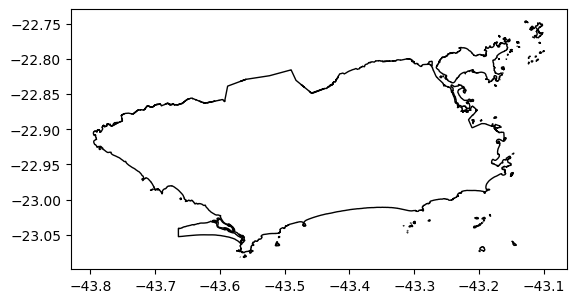

In [ ]:
shape_rj = gpd.read_file('/content/drive/MyDrive/ic_fabricio/dados/shape cidade do rio/Cidade do Rio.shp')
shape_rj.plot(facecolor = 'None', edgecolor = 'black', linewidth = 1)

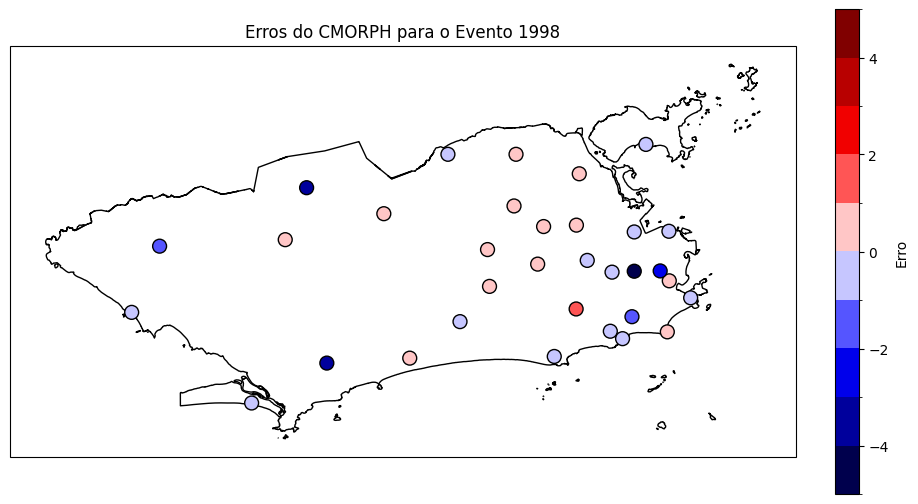

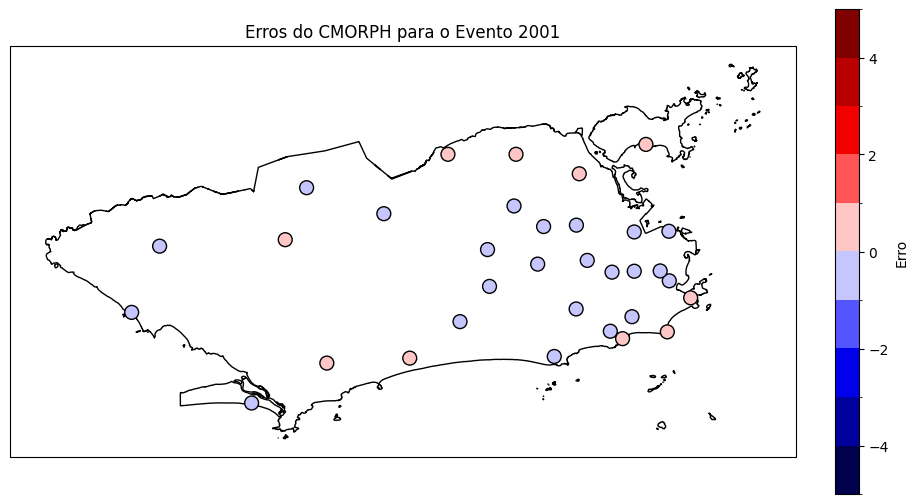

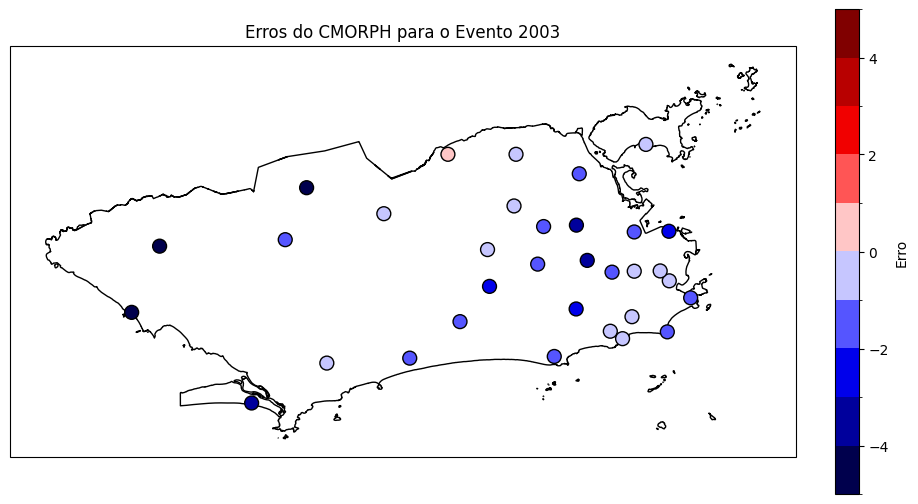

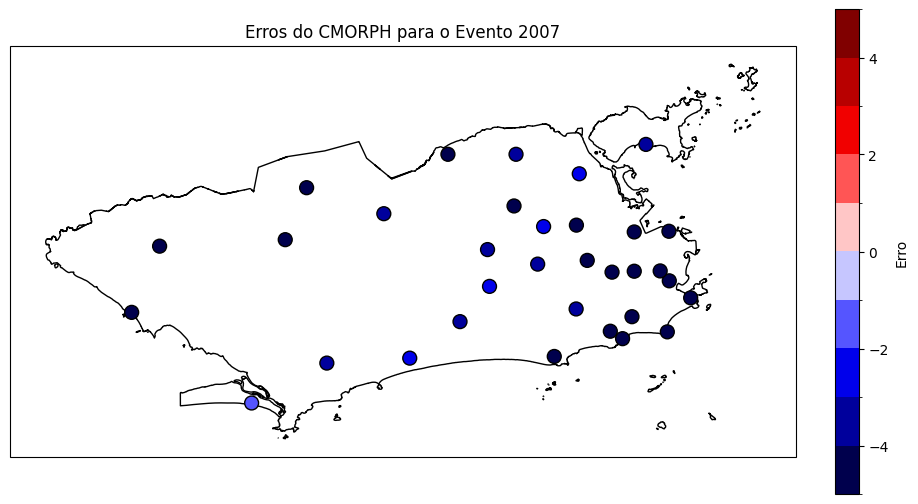

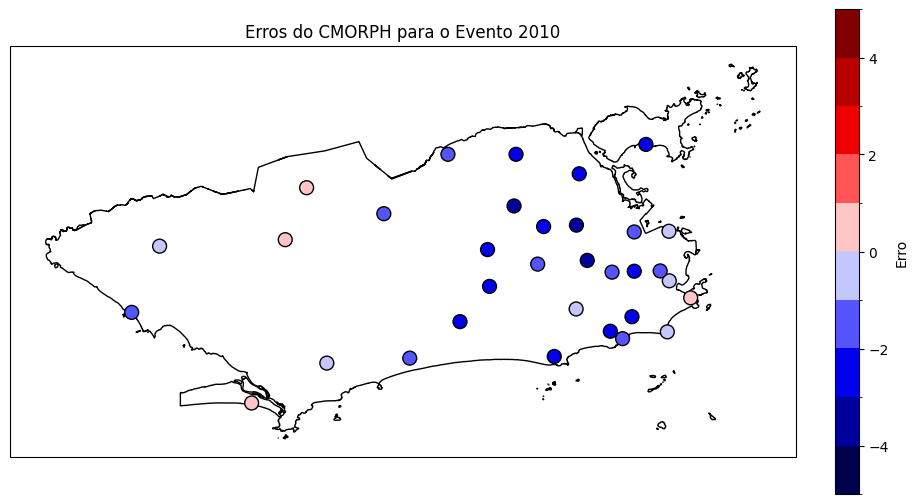

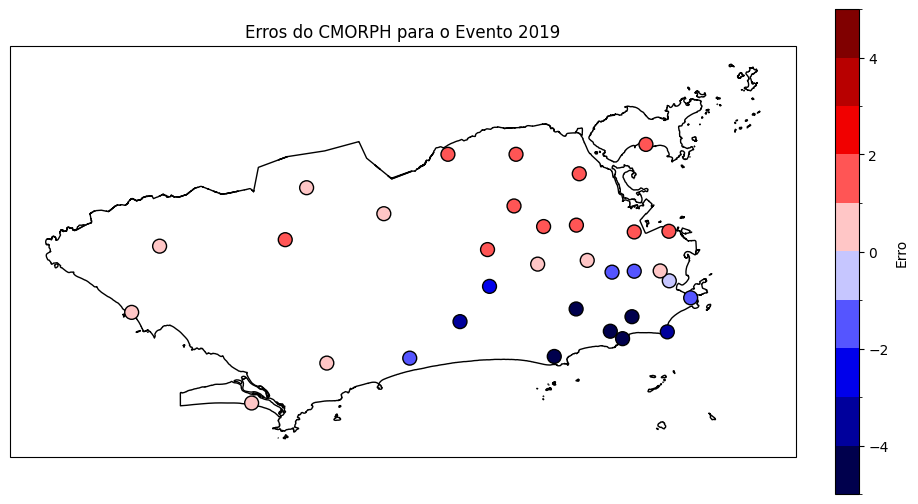

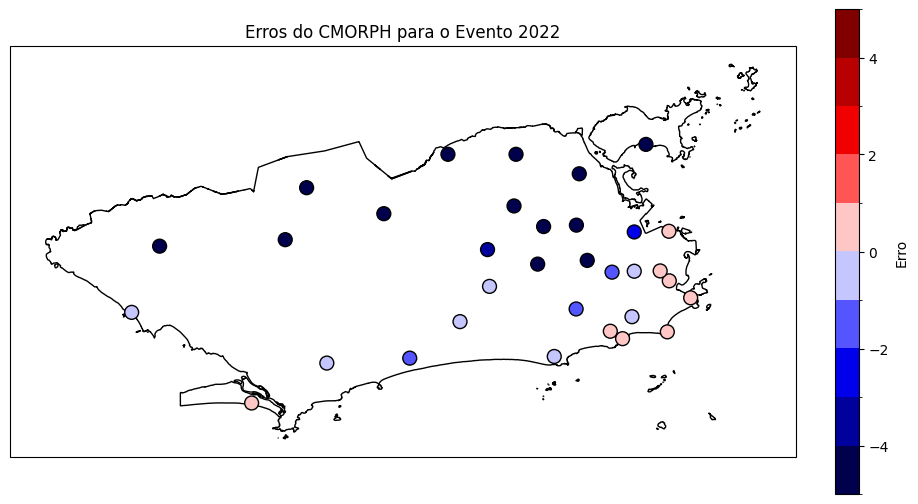

In [ ]:
# Criar proprio colormap
from matplotlib.colors import ListedColormap, BoundaryNorm

limites = list(np.arange(-5, 6, 1))
cmap_base = plt.cm.get_cmap('seismic', len(limites) - 1)
cores = cmap_base(np.linspace(0,1,len(limites) - 1))
cmap_discreto = ListedColormap(cores)
norm = BoundaryNorm(limites, cmap_discreto.N)

for evento in coordenadas_erros['Evento'].unique():
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Mapa base da cidade
    shape_rj.plot(ax=ax, facecolor='None', edgecolor='black', linewidth=1)

    # Filtrar evento
    df_evento = coordenadas_erros[coordenadas_erros['Evento'] == evento].drop('cota_m', axis = 1)

    # Gráfico de dispersão manual com controle total
    scatter = ax.scatter(
        df_evento["Longitude"],
        df_evento["Latitude"],
        c=df_evento["Erro"],
        cmap=cmap_discreto,
        norm=norm,
        s=100,
        edgecolor="k"
    )

    # Ajuste fino da colorbar
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, pad=0.04)
    cbar.set_label("Erro")

    ax.set_title(f"Erros do CMORPH para o Evento {evento}")
    fig.tight_layout()
    fig.savefig(f"/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/erros_cmorph_{evento}.png",
                 bbox_inches='tight', dpi = 300)
    plt.show()
